## Homework:
Highly nonlinear oscillator:

Recall the numerical solution for oscillations of a spring with power p = 12 (use F=-y[0]**11). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal. (Landau 289)

Warning: please only sample the data within one period

Landau, Rubin H., Manuel Páez, Cristian Bordeianu. Computational Physics: Problem Solving with Python, 3rd Edition. Wiley-Blackwell, 2015-07-15. VitalBook file.

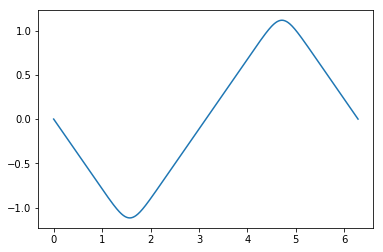

In [1]:
import matplotlib.pylab as p
import numpy as np
%matplotlib inline

#   Initialization
a = 0.
b = 6.2832
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0;   y[1] = -0.789524
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1] # finish this line                                            
    fReturn[1] = -y[0]**11# finish this line      
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])

p.plot(xp,yp)
p.show()

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


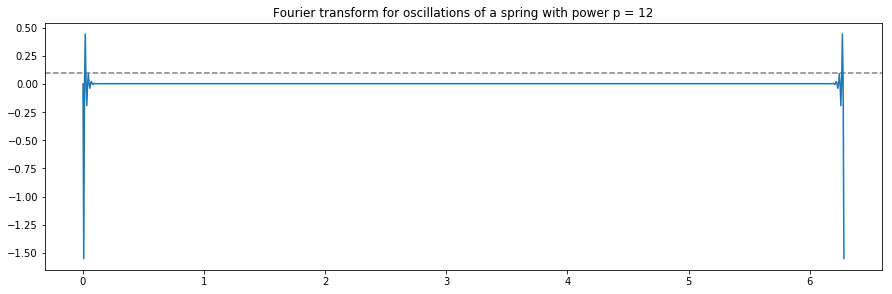

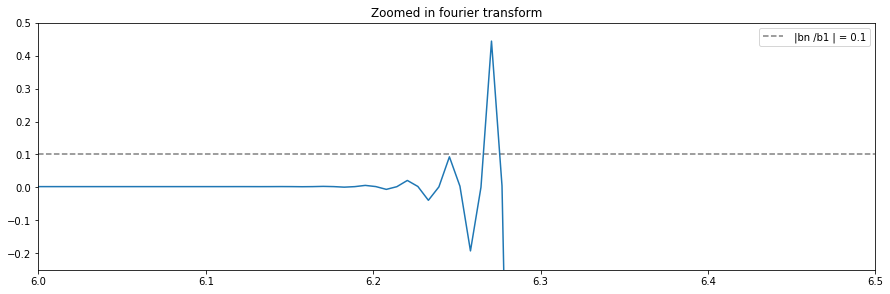

In [2]:
ft = np.fft.fft(yp)
fig = p.figure(figsize = (15,10))
p.subplot(2, 1, 1)
p.title('Fourier transform for oscillations of a spring with power p = 12')
p.axhline(y=0.1, color="gray", linestyle='--')
p.plot(xp, ft)
p.show()

fig = p.figure(figsize = (15,10))
p.subplot(2, 1, 1)
p.title('Zoomed in fourier transform')
p.xlim((6,6.5))
p.ylim((-0.25,0.50))
p.axhline(y=0.1, color="gray", linestyle='--',label = ' |bn /b1 | = 0.1')
p.plot(xp, ft)
p.legend(loc='best')
p.show()


### In this case, I believe that the number of higher harmonics that contribute below 10% are n = 5.

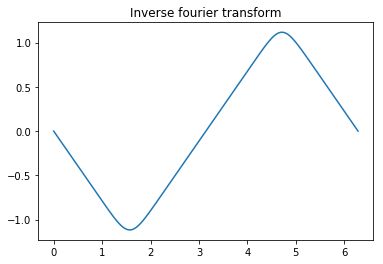

In [3]:
ft_inv = np.fft.ifft(ft)
p.plot(xp,ft_inv)
p.title('Inverse fourier transform')
p.show()